### Milestone 4: Modeling, Tuning, and Visualizing

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import cross_val_score

#### Step 1: Data Preparation

In [2]:
# Load data
file_path = './data/NYC_Weather_2022-2024.csv'
nyc_weather_data = pd.read_csv(file_path)

nyc_weather_data

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT11
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,NaN,NaN,NaN,NaN,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,NaN,NaN,NaN,NaN,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,NaN,NaN,NaN,NaN,0.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,NaN,NaN,NaN,NaN,0.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,NaN,NaN,NaN,NaN,1.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66278,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-26,NaN,NaN,NaN,NaN,0.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66279,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-27,NaN,NaN,NaN,NaN,0.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66280,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-28,NaN,NaN,NaN,NaN,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66281,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-30,NaN,NaN,NaN,NaN,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Select relevant features
relevant_columns = ['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD']
weather_subset = nyc_weather_data[relevant_columns].copy()

weather_subset

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
66278,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-26,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66279,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-27,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66280,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-28,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66281,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-30,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert 'DATE' to datetime format
weather_subset['DATE'] = pd.to_datetime(weather_subset['DATE'])

# Fill missing values with the median
weather_subset.fillna(weather_subset.median(numeric_only=True), inplace=True)

weather_subset

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,1.05,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,0.00,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,0.09,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,0.50,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,1.38,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66278,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-26,0.10,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
66279,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-27,0.07,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
66280,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-28,0.97,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
66281,US1NJHD0023,"JERSEY CITY 1.6 NNE, NJ US",2024-11-30,0.00,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0


In [5]:
# Separate the 'DATE' column
date_column = weather_subset['DATE']
station_column = weather_subset['STATION']
name_column = weather_subset['NAME']
weather_numeric = weather_subset.drop(columns=['DATE', 'STATION', 'NAME'])

# Normalize numerical features
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_numeric)

# Recombine 'DATE' with the scaled data
weather_scaled_df = pd.DataFrame(weather_scaled, columns=weather_numeric.columns)
weather_scaled_df.insert(0, 'STATION', station_column.reset_index(drop=True))
weather_scaled_df.insert(1, 'NAME', name_column.reset_index(drop=True))
weather_scaled_df.insert(2, 'DATE', date_column.reset_index(drop=True))


# Verify the scaled data
weather_scaled_df.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,2.133103,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,-0.370117,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,-0.155555,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,0.821893,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,2.919830,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374


In [6]:
# Group data by 'STATION' and save each group to a separate file
stations = weather_scaled_df['STATION'].unique()

num_stations = len(stations)

# Directory to save split files
output_dir = './data/split_stations/'

# Create directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Save each station's data to a separate CSV file
file_paths = []
for station in stations:
    station_data = weather_scaled_df[weather_scaled_df['STATION'] == station]
    file_name = f"{station.replace('/', '_')}.csv"
    file_path = os.path.join(output_dir, file_name)
    station_data.to_csv(file_path, index=False)
    file_paths.append(file_path)

print(f"Data saved for {num_stations} stations.")

Data saved for 127 stations.


In [7]:
# Check completeness of data for each station
completeness_report = {}

for station in stations:
    station_data = weather_scaled_df[weather_scaled_df['STATION'] == station]
    
    # Define relevant columns for completeness check
    relevant_columns = ['TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD', 'PRCP']
    
    # Extract the station name (index 1 in weather_scaled_df)
    station_name = station_data.iloc[0, 1]  # Assuming the name is at index 1

    # Count non-NaN rows
    valid_rows = station_data[relevant_columns].dropna().shape[0]
    total_rows = station_data.shape[0]
    
    # Store completeness info along with station name
    completeness_report[station] = {
        'Name': station_name,
        'Valid Rows': valid_rows,
        'Total Rows': total_rows,
        'Completeness %': (valid_rows / total_rows) * 100
    }

# Convert report to DataFrame for sorting
completeness_df = pd.DataFrame.from_dict(completeness_report, orient='index')
completeness_df = completeness_df.sort_values(by='Valid Rows', ascending=False)

# Display the station with the most complete data
most_complete_station = completeness_df.index[0]
most_complete_station_name = completeness_df.loc[most_complete_station, 'Name']

print(f"The station with the most complete data is: {most_complete_station} ({most_complete_station_name})")
completeness_df.head()

The station with the most complete data is: USW00014734 (NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US)


,Name,Valid Rows,Total Rows,Completeness %
USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",732,732,100.0
US1NJBG0064,"WOOD RIDGE 0.2 N, NJ US",732,732,100.0
USW00014732,"LAGUARDIA AIRPORT, NY US",732,732,100.0
USC00301309,"CENTERPORT, NY US",732,732,100.0
USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",732,732,100.0


In [8]:
# Split data into train and test sets (time-based split)
train_data = weather_scaled_df[weather_scaled_df['DATE'] < '2024-01-01']
test_data = weather_scaled_df[weather_scaled_df['DATE'] >= '2024-01-01']

#### Step 2: Modeling

In [9]:
# Define features and target
features = ['TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD', 'PRCP']
target = 'PRCP'  # Predicting precipitation

X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

In [10]:
# Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

In [11]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.0012336860077442713
R²: 0.9999982802836244


In [12]:
# Perform cross-validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R²: {np.mean(cv_scores)}")

Cross-validated R² scores: [0.99999643 0.99814272 0.99995528 0.99970146 0.99997259]
Mean R²: 0.9995536939853993


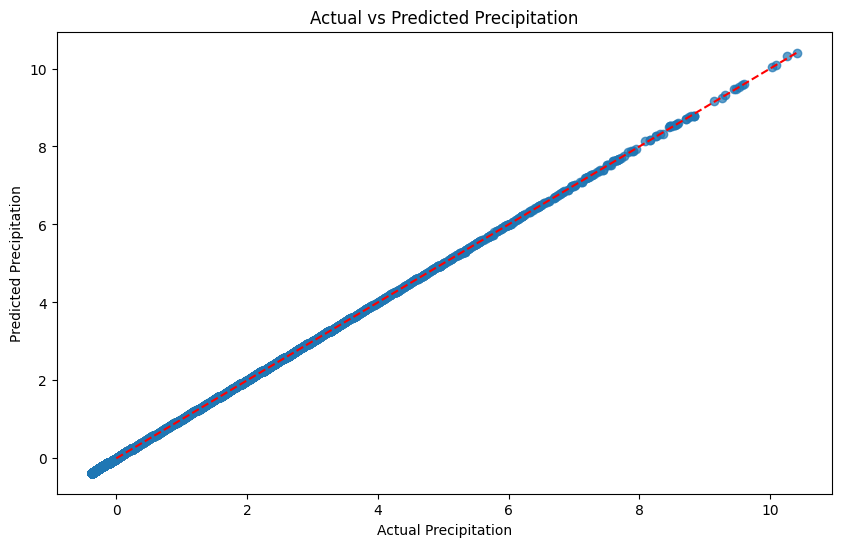

In [13]:
# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.show()

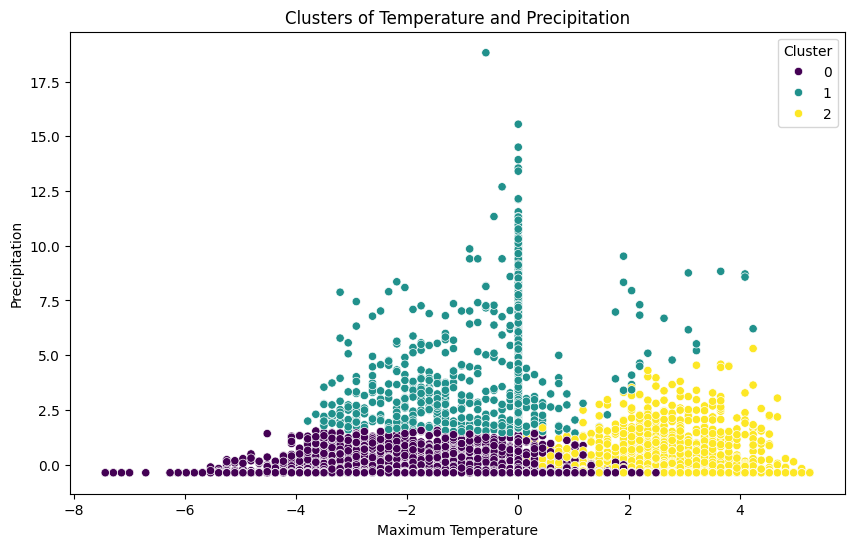

In [14]:
# Perform clustering on temperature and precipitation
cluster_data = weather_scaled_df[['TMAX', 'TMIN', 'PRCP']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_data, x='TMAX', y='PRCP', hue='Cluster', palette='viridis')
plt.title("Clusters of Temperature and Precipitation")
plt.xlabel("Maximum Temperature")
plt.ylabel("Precipitation")
plt.show()

#### Step 3: Interface

In [15]:
from dash import dcc, html, Input, Output, callback_context
import dash
import plotly.graph_objs as go

In [16]:
# Use cleaned data
weather_data = weather_scaled_df.copy()

# Define features and target variables
features = ['TMAX', 'TMIN', 'PRCP', 'AWND', 'WDF2', 'WESF', 'WESD']
targets = ['TMAX', 'TMIN', 'PRCP', 'AWND']

# Unscale function
def unscale(scaler, data, columns):
    unscaled_data = pd.DataFrame(scaler.inverse_transform(data), columns=columns)
    return unscaled_data

In [17]:
# Train/test split
scaler = StandardScaler()
X_train = weather_data[features]
y_train = weather_data[targets]

# Fit scaler and unscale for targets
scaler.fit(weather_data[features])
target_scaler = StandardScaler().fit(y_train)
y_train = target_scaler.transform(y_train)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict tomorrow's weather
def predict_tomorrow(data, scaler, target_scaler):
    # Use the last available row as input
    last_row = data[features].iloc[-1].values.reshape(1, -1)
    scaled_prediction = model.predict(last_row)
    unscaled_prediction = unscale(target_scaler, scaled_prediction, targets)
    return dict(zip(targets, unscaled_prediction.iloc[0]))

In [ ]:
# Dash app setup
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("NYC Weather Tomorrow"),
    
    html.Div(id='forecast-display', style={'font-size': '20px', 'margin': '20px 0'}),

    html.Label("Are you satisfied with the forecast?"),
    html.Div([
        html.Button('Sunny Day', id='sunny-button', n_clicks=0),
        html.Button('Rainy Day', id='rainy-button', n_clicks=0),
        html.Button('Snowy Day', id='snowy-button', n_clicks=0),
        html.Button('Windy Day', id='windy-button', n_clicks=0),
    ], style={'margin': '10px 0'}),

    html.Div(id='user-choice-display', style={'font-size': '18px', 'margin': '20px 0'}),

    dcc.Graph(id='weather-graph', animate=True),
])

# Callback
@app.callback(
    [Output('forecast-display', 'children'),
     Output('user-choice-display', 'children'),
     Output('weather-graph', 'figure')],
    [Input('sunny-button', 'n_clicks'),
     Input('rainy-button', 'n_clicks'),
     Input('snowy-button', 'n_clicks'),
     Input('windy-button', 'n_clicks')]
)
def update_weather(sunny_clicks, rainy_clicks, snowy_clicks, windy_clicks):
    # Determine which button was clicked
    ctx = callback_context
    if not ctx.triggered:
        button_id = 'None'
    else:
        button_id = ctx.triggered[0]['prop_id'].split('.')[0]

    # Predict tomorrow's weather
    forecast = predict_tomorrow(weather_data, scaler, target_scaler)

    # Round min/max temperatures
    forecast['TMAX'] = round(forecast['TMAX'])
    forecast['TMIN'] = round(forecast['TMIN'])

    forecast_message = (
    )

    # Adjust forecast based on the clicked button
    user_choice_message = ""
    modified_forecast = forecast.copy()

    # Apply user choice
    if button_id == 'sunny-button':
        modified_forecast['TMAX'] += 5
        modified_forecast['PRCP'] = 0
        user_choice_message = "Enjoy the warmth!"
    elif button_id == 'rainy-button':
        modified_forecast['PRCP'] += 10
        user_choice_message = "Don't forget your umbrella!"
    elif button_id == 'snowy-button':
        modified_forecast['PRCP'] += 5
        modified_forecast['TMAX'] -= 5
        user_choice_message = "Time for a snowball fight!"
    elif button_id == 'windy-button':
        modified_forecast['AWND'] += 5
        user_choice_message = "Hold onto your hat!"

    # Debug the forecast values
    print("Forecast:", modified_forecast)

    # Plot the changes dynamically
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=["Max Temp", "Min Temp", "Precipitation", "Wind Speed"],
        y=list(modified_forecast.values()),
        mode='lines+markers',
        line=dict(color="skyblue", width=4),
        marker=dict(size=10, symbol='circle'),
        name="Modified Forecast"
    ))

    # Ensure y-axis is properly scaled
    fig.update_layout(
        title="Tomorrow's Weather Forecast",
        xaxis_title="Weather Parameter",
        yaxis_title="Value",
        yaxis=dict(range=[min(modified_forecast.values()) - 5, max(modified_forecast.values()) + 5]),
    )

    return forecast_message, user_choice_message, fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)